In [1]:
# References
# https://www.analyticsvidhya.com/blog/2018/02/the-different-methods-deal-text-data-predictive-python/  

In [1]:
from glob import glob
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import string as st
from numpy import asarray
from numpy import zeros
from numpy import array
import re
from collections import Counter

In [2]:
############################################################################################
# DROP COLUMNS
############################################################################################

# df = pd.read_csv("IRAhandle_tweets_1.csv")

# Read all files
stock_files = sorted(glob('russian-troll-tweets-master/IRAhandle_tweets_*.csv'))
stock_files
df = pd.concat((pd.read_csv(file) for file in stock_files), ignore_index=True)
print(df.shape)

/Users/nirav/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  # Remove the CWD from sys.path while we load stuff.
/Users/nirav/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DtypeWarning: Columns (10,20) have mixed types. Specify dtype option on import or set low_memory=False.
  # Remove the CWD from sys.path while we load stuff.
/Users/nirav/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DtypeWarning: Columns (0,15,20) have mixed types. Specify dtype option on import or set low_memory=False.
  # Remove the CWD from sys.path while we load stuff.


(2946207, 21)


In [3]:
############################################################################################
# DROP COLUMNS
############################################################################################

df = df.drop(["external_author_id", "alt_external_id", "tweet_id", "new_june_2018", "article_url", "tco1_step1", \
             "tco2_step1", "tco3_step1"],axis=1)
df.shape

(2946207, 13)

In [4]:
df.head(5)

,author,content,region,language,publish_date,harvested_date,following,followers,updates,post_type,account_type,retweet,account_category
0,10_GOP,"""We have a sitting Democrat US Senator on tria...",Unknown,English,10/1/2017 19:58,10/1/2017 19:59,1052,9636,253,NaN,Right,0,RightTroll
1,10_GOP,Marshawn Lynch arrives to game in anti-Trump s...,Unknown,English,10/1/2017 22:43,10/1/2017 22:43,1054,9637,254,NaN,Right,0,RightTroll
2,10_GOP,Daughter of fallen Navy Sailor delivers powerf...,Unknown,English,10/1/2017 22:50,10/1/2017 22:51,1054,9637,255,RETWEET,Right,1,RightTroll
3,10_GOP,JUST IN: President Trump dedicates Presidents ...,Unknown,English,10/1/2017 23:52,10/1/2017 23:52,1062,9642,256,NaN,Right,0,RightTroll
4,10_GOP,"19,000 RESPECTING our National Anthem! #StandF...",Unknown,English,10/1/2017 2:13,10/1/2017 2:13,1050,9645,246,RETWEET,Right,1,RightTroll


### SECTION 2.1, FIGURE 1: The cell below creates figure 1

Text(0, 0.5, 'Tweet Count')

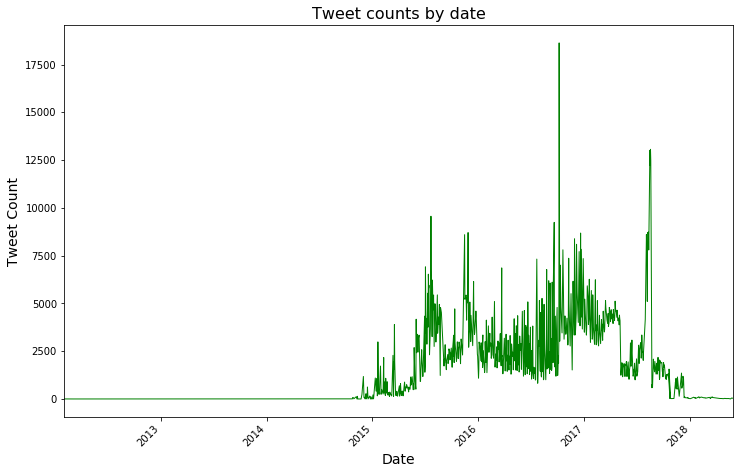

In [6]:
############################################################################################
# TWEET ACTIVITY ACROSS DAYS
############################################################################################

df['created_str'] = pd.to_datetime(df['publish_date'])
df['created_str'] = pd.to_datetime(df['created_str'].dt.date)

tweet_trend = pd.DataFrame(df['created_str'].value_counts())
# index is date, columns indicate tweet count on that day
tweet_trend.columns = ['tweet_count']
tweet_trend.sort_index(ascending = True, inplace = True)

plt.style.use('fast')
tweet_trend['tweet_count'].plot(linestyle = "-", figsize = (12,8), rot = 45, color = 'g',linewidth = 1)
plt.title('Tweet counts by date', fontsize = 16)
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Tweet Count', fontsize = 14)

In [8]:
# Sort in ascending order
tweet_trend.sort_values(by=["tweet_count"], ascending = False, inplace = True)


### SECTION 2.0, TABLE 1: The cell below create table A1

In [9]:
tweet_trend.head(20)

,tweet_count
2016-10-06,18634
2017-08-17,13066
2017-08-15,13012
2017-08-12,12981
2017-08-18,12470
2017-08-16,12225
2017-08-13,10981
2017-08-14,10700
2016-10-07,10271
2015-07-22,9564


### SECTION 2.2, FIGURE 2: The code cell below creates figure 2

The tweets in this data are in  56 languages
10 most common languages are shown below
           Languages | Number of tweets
----------------------------------------------
             English | 2116867
             Russian | 610943
              German | 86983
           Ukrainian | 38669
             Italian | 18063
             Serbian | 9480
               Uzbek | 9334
           Bulgarian | 9236
  LANGUAGE UNDEFINED | 8320
              Arabic | 7588


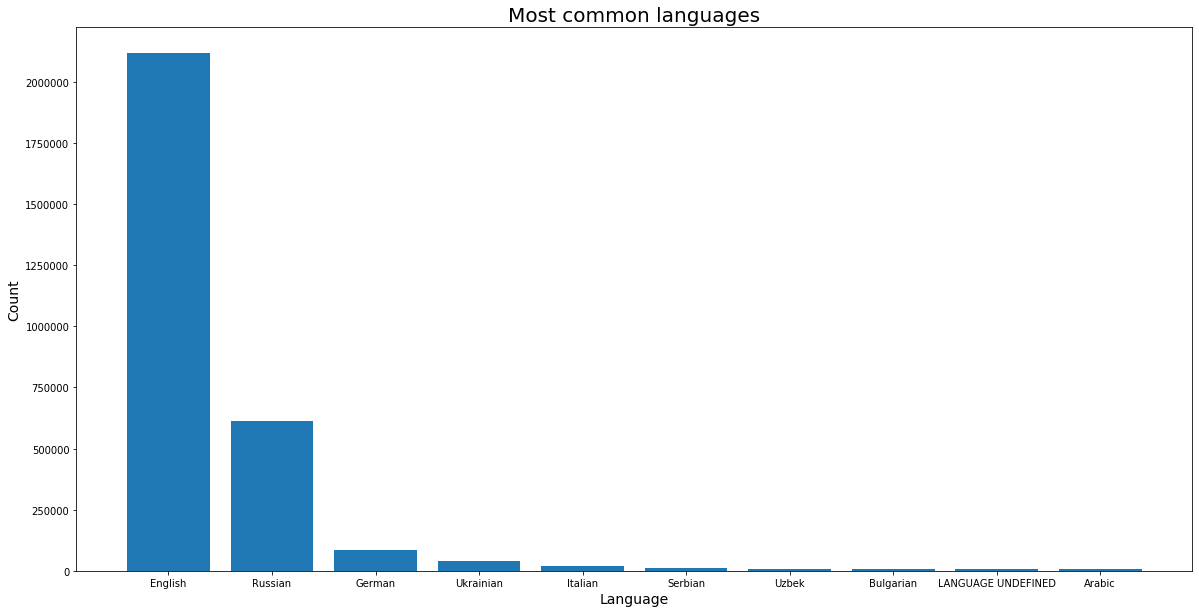

In [10]:
############################################################################################
# LANGUAGES
############################################################################################

dict = {}

for language in df["language"]:
    if language not in dict:
        dict[language] = 0
    dict[language] += 1

print("The tweets in this data are in ", len(dict), "languages")
print("10 most common languages are shown below")

high = Counter(dict).most_common(10)
    
print("%20s | %s" % ("Languages", "Number of tweets"))
print("----------------------------------------------")

for tup in high:
    print("%20s | %d" % (tup[0], tup[1]))
    
x_axis = [a for (a,c) in high]
y_axis = [c for (a,c) in high]

fig=plt.figure(figsize=(20,10))
plt.bar(x_axis,y_axis)
plt.xlabel("Language", fontsize = 14)
plt.ylabel("Count", fontsize = 14)
plt.title("Most common languages", fontsize = 20)
plt.show(fig)    

In [5]:
############################################################################################
# FILTER FOR TWEETS IN ENGLISH
############################################################################################

df = df.loc[df['language'] == "English"]
df.shape

(2116867, 13)

### SECTION 2.3, FIGURE 3: The code cell below creates figure 3

The tweets in this data are tagged as being from  30 different regions
10 most regions are shown below
                  Regions | Number of tweets
----------------------------------------------
            United States | 1844451
                  Unknown | 240953
           United Kingdom | 16663
               Azerbaijan | 6911
                  Germany | 1285
       Russian Federation | 1145
                      nan | 1136
                    Italy | 1125
                   Canada | 600
              Afghanistan | 461
                  Belarus | 449
                     Iraq | 427
                   Israel | 409
     United Arab Emirates | 370
                  Ukraine | 146


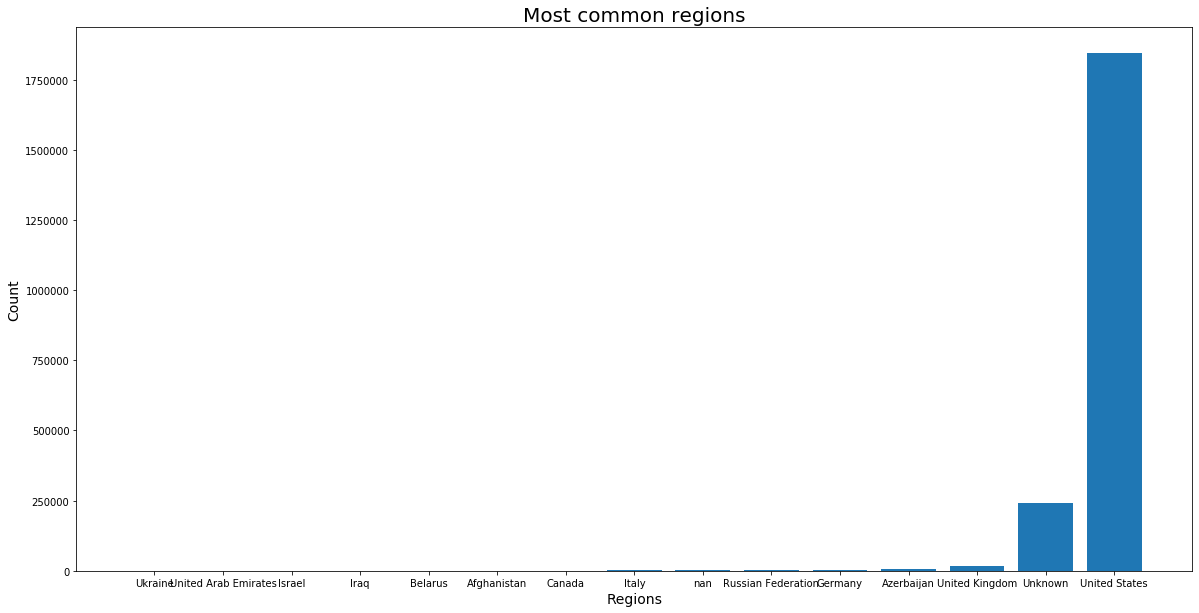

In [12]:
############################################################################################
# REGIONS
############################################################################################

dict = {}

for region in df["region"]:
    if region not in dict:
        dict[region] = 0
    dict[region] += 1

print("The tweets in this data are tagged as being from ", len(dict), "different regions")
print("10 most regions are shown below")

high = Counter(dict).most_common(15)

print("%25s | %s" % ("Regions", "Number of tweets"))
print("----------------------------------------------")

for tup in high:
    print("%25s | %d" % (tup[0], tup[1]))
    
dict = {}

for (a,b) in high:
    dict[b] = a

y_axis = [k for (k,v) in dict.items()]
y_axis.sort()

x_axis = [str(dict[number]) for number in y_axis]

fig=plt.figure(figsize=(20,10))
plt.bar(x_axis,y_axis)
plt.xlabel("Regions", fontsize = 14)
plt.ylabel("Count", fontsize = 14)
plt.title("Most common regions", fontsize = 20)
plt.show(fig)      

### SECTION 2.4, FIGURE 4 and TABLE 2: The code cell below creates Figure 4 and part of the data for Table 2

There are  17 different types of account types
10 with the highest count are shown below. 
   Account Type | Count
-------------------------------------------
          Right | 704953
          local | 458012
           Left | 422141
      Hashtager | 236092
           news | 138581
     Commercial | 112580
        Russian | 20015
           Koch | 10759
              ? | 6945
         German | 3567
        Italian | 1799
         Arabic | 1030
     ZAPOROSHIA | 172
        Spanish | 79
         French | 70
         Ebola  | 70
     Portuguese | 2


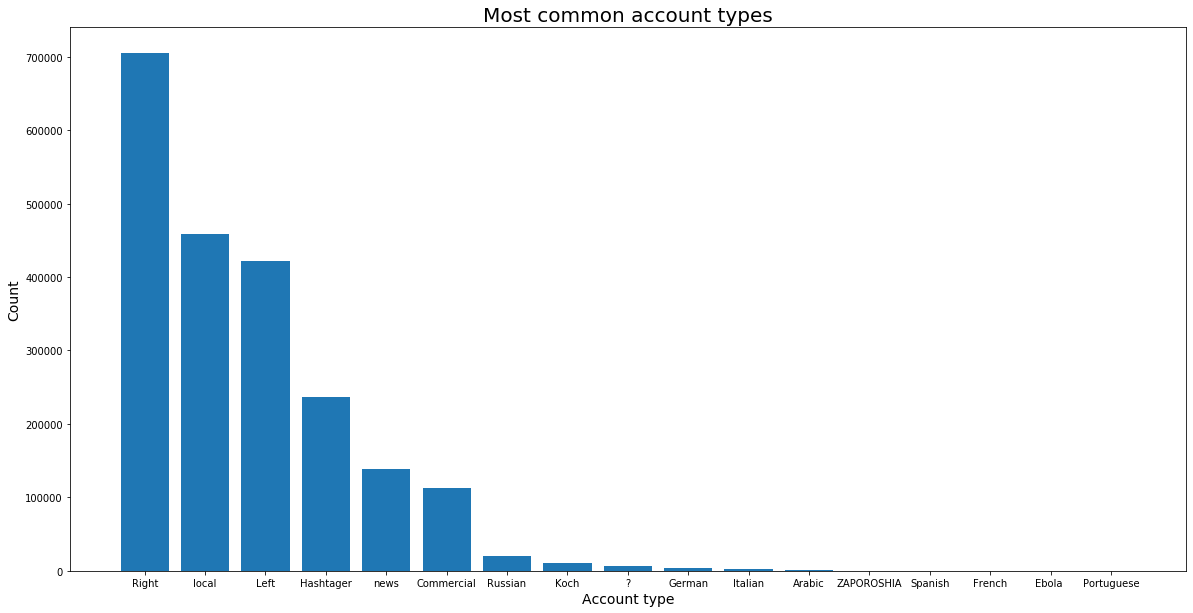

In [13]:
############################################################################################
# ACCOUNT TYPE
############################################################################################

dict = {}

for accnt_ty in df["account_type"]:
    if accnt_ty not in dict:
        dict[accnt_ty] = 0
    dict[accnt_ty] += 1

high = Counter(dict).most_common(25)

print("There are ", len(dict), "different types of account types")
print("10 with the highest count are shown below. ")

print("%15s | %s" % ("Account Type", "Count"))
print("-------------------------------------------")

for tup in high:
    print("%15s | %d" % (tup[0], tup[1]))

x_axis = [a for (a,c) in high]
y_axis = [c for (a,c) in high]

fig=plt.figure(figsize=(20,10))
plt.bar(x_axis,y_axis)
plt.xlabel("Account type", fontsize = 14)
plt.ylabel("Count", fontsize = 14)
plt.title("Most common account types", fontsize=20)
plt.show(fig)

### SECTION 2.4, FIGURE 5 and TABLE 2: The code cell below creates Figure 5 and part of the data for Table 2

There are  8 different types of account categories
   Account Type | Count
-------------------------------------------
     RightTroll | 704953
       NewsFeed | 596593
      LeftTroll | 422141
   HashtagGamer | 236092
     Commercial | 112580
     NonEnglish | 26562
     Fearmonger | 11001
        Unknown | 6945


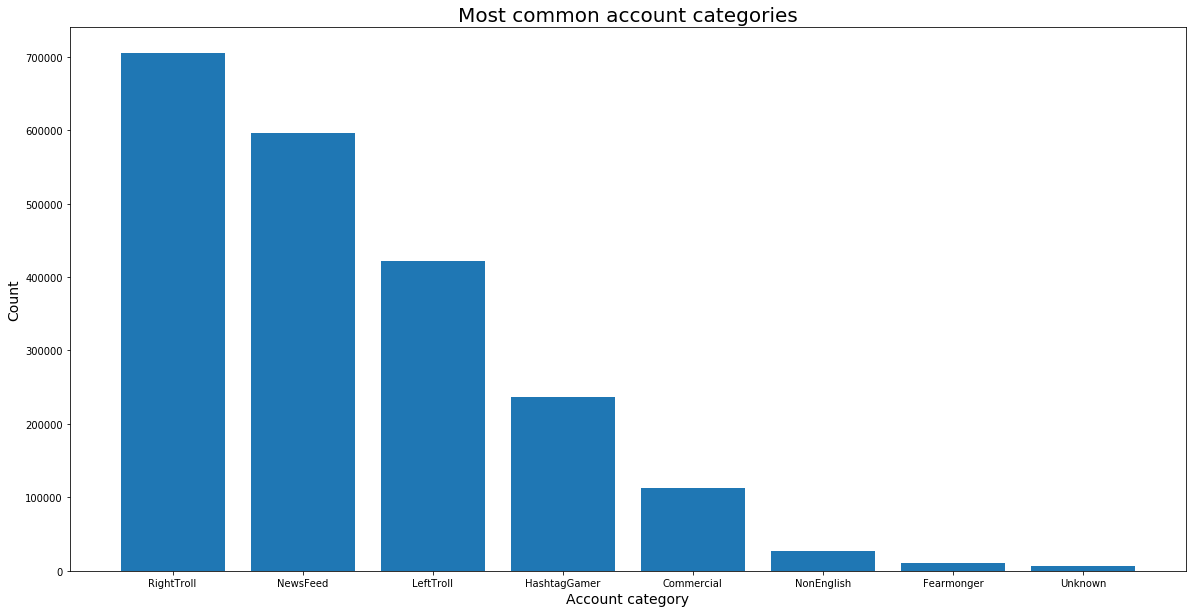

In [14]:
############################################################################################
# ACCOUNT CATEGORY
############################################################################################

dict = {}

for accnt_ctgry in df["account_category"]:
    if accnt_ctgry not in dict:
        dict[accnt_ctgry] = 0
    dict[accnt_ctgry] += 1

high = Counter(dict).most_common(15)

print("There are ", len(dict), "different types of account categories")

print("%15s | %s" % ("Account Type", "Count"))
print("-------------------------------------------")

for tup in high:
    print("%15s | %d" % (tup[0], tup[1]))

x_axis = [a for (a,c) in high]
y_axis = [c for (a,c) in high]

fig=plt.figure(figsize=(20,10))
plt.bar(x_axis,y_axis)
plt.xlabel("Account category", fontsize = 14)
plt.ylabel("Count", fontsize = 14)
plt.title("Most common account categories", fontsize = 20)
plt.show(fig)    


### SECTION 2.5, TABLE 3 and 4: The code cell below creates parts of information in Table 3 and 4

There are  2161 authors / users in this data
         Author | Number of tweets
----------------------------------------------
        EXQUOTE | 53158
  SCREAMYMONKEY | 43956
  WORLDNEWSPOLI | 35082
  AMELIEBALDWIN | 34308
TODAYPITTSBURGH | 33377
  SPECIALAFFAIR | 32416
   SEATTLE_POST | 30680
KANSASDAILYNEWS | 28746
    ROOMOFRUMOR | 28259
   DAILYSANFRAN | 27962
       FINDDIET | 25941
COVFEFENATIONUS | 23463
WORLDOFHASHTAGS | 23301
    JENN_ABRAMS | 22521
CHICAGODAILYNEW | 22112
       FUNDDIET | 19860
 CHESPLAYSCHESS | 18970
    TODAYNYCITY | 18478
ONLINECLEVELAND | 17657
        HYDDROX | 17288


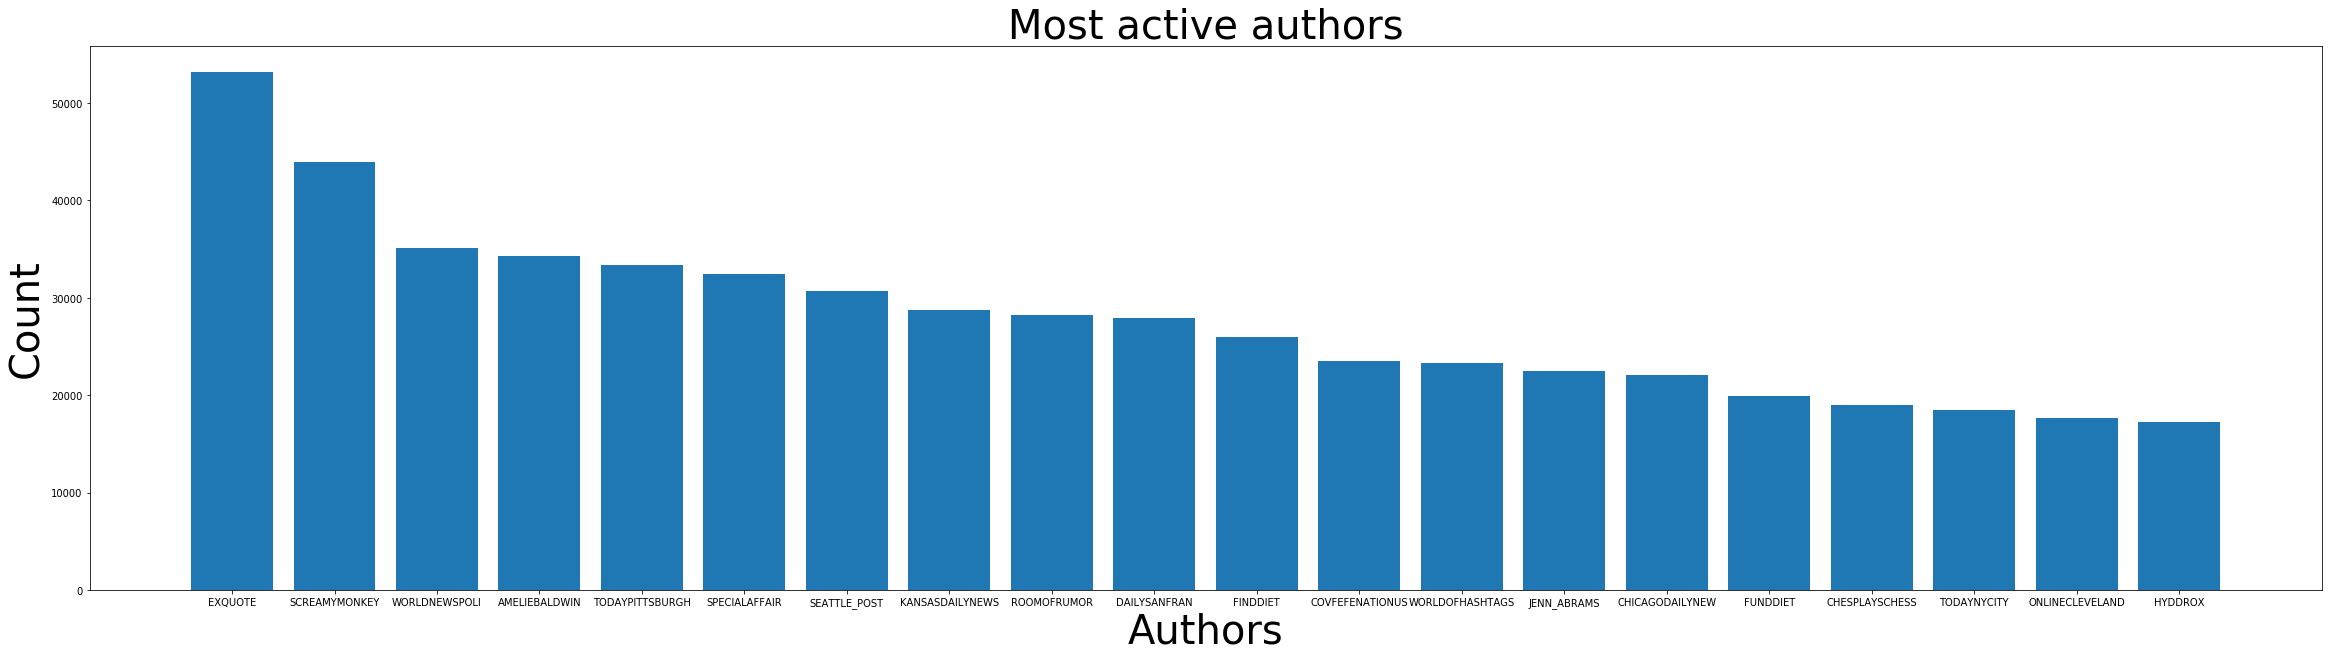

In [6]:
############################################################################################
# 20 MOST ACTIVE TWEETERS
############################################################################################

from collections import Counter

dict = {}
for author in df["author"]:
    if author not in dict:
        dict[author] = 0
    dict[author] += 1

print("There are ", len(dict), "authors / users in this data")

high = Counter(dict).most_common(20)
    
print("%15s | %s" % ("Author", "Number of tweets"))
print("----------------------------------------------")

with open("active_authors.csv", 'w') as file_write:
    
    for tup in high:
        print("%15s | %d" % (tup[0], tup[1]))
        file_write.write("%15s,%d\n" % (tup[0], tup[1]))
    

x_axis = [a for (a,c) in high]
y_axis = [c for (a,c) in high]

fig=plt.figure(figsize=(40,10))
plt.bar(x_axis,y_axis)
plt.xlabel("Authors", fontsize=40)
plt.ylabel("Count", fontsize=40)
plt.title("Most active authors", fontsize=40)
plt.show(fig)    

active_authors = x_axis

### SECTION 2.5, TABLE 3 and 4: The code cell below creates parts of information in Table 3 and 4

In [7]:
############################################################################################
# MORE INFORMATION ABOUT ACTIVE AUTHORS
############################################################################################

dict = {}

data = df[["author", "content", "account_category", "account_type", "followers"]].copy()
data.head(5)

with open("active_authors.csv", 'w') as file_write:

    for author in active_authors:
        temp = data.loc[data["author"] == author]
        followers = (temp["followers"].max())
        for (index, row) in temp.iterrows():
            file_write.write("%s,%s,%d\n" % (row["account_category"], row['account_type'], followers))
            break

In [8]:
df.head(5)

,author,content,region,language,publish_date,harvested_date,following,followers,updates,post_type,account_type,retweet,account_category
0,10_GOP,"""We have a sitting Democrat US Senator on tria...",Unknown,English,10/1/2017 19:58,10/1/2017 19:59,1052,9636,253,NaN,Right,0,RightTroll
1,10_GOP,Marshawn Lynch arrives to game in anti-Trump s...,Unknown,English,10/1/2017 22:43,10/1/2017 22:43,1054,9637,254,NaN,Right,0,RightTroll
2,10_GOP,Daughter of fallen Navy Sailor delivers powerf...,Unknown,English,10/1/2017 22:50,10/1/2017 22:51,1054,9637,255,RETWEET,Right,1,RightTroll
3,10_GOP,JUST IN: President Trump dedicates Presidents ...,Unknown,English,10/1/2017 23:52,10/1/2017 23:52,1062,9642,256,NaN,Right,0,RightTroll
4,10_GOP,"19,000 RESPECTING our National Anthem! #StandF...",Unknown,English,10/1/2017 2:13,10/1/2017 2:13,1050,9645,246,RETWEET,Right,1,RightTroll


### SECTION 2.5, TABLE 5: The code cell below creates information in Table 5

In [9]:
############################################################################################
# ACTIVE AUTHOR RETWEETS
############################################################################################

data = df[["author", "content", "retweet"]]

print("%20s | %s" % ("AUTHOR", "NUMBER OF RETWEETS"))
for author in active_authors:
    temp = data.loc[data["author"] == author]
    t_1 = temp.loc[data["retweet"] == 1]
    print("%20s | %d" % (author, t_1.shape[0]))

              AUTHOR | NUMBER OF RETWEETS
             EXQUOTE | 71
       SCREAMYMONKEY | 0
       WORLDNEWSPOLI | 0
       AMELIEBALDWIN | 32964
     TODAYPITTSBURGH | 25
       SPECIALAFFAIR | 0
        SEATTLE_POST | 13
     KANSASDAILYNEWS | 5
         ROOMOFRUMOR | 0
        DAILYSANFRAN | 14
            FINDDIET | 5041
     COVFEFENATIONUS | 20729
     WORLDOFHASHTAGS | 22895
         JENN_ABRAMS | 1661
     CHICAGODAILYNEW | 4
            FUNDDIET | 0
      CHESPLAYSCHESS | 18370
         TODAYNYCITY | 17
     ONLINECLEVELAND | 16
             HYDDROX | 16646


### SECTION 2.5, FIGURE 6: The code cell below creates figure 6

In [ ]:
############################################################################################
# ACTIVITY OF ALL AUTHORS ACROSS 24 HOURS
############################################################################################

data = df[["author", "content", "account_category", "account_type", "followers", "publish_date"]].copy()
data.head(5)


# add a column with times
time_list = []
for date in data["publish_date"]:
    time = date.split()[1]
    time = datetime.datetime.strptime(time, "%H:%M").time()
    time_list.append(time)
    
data["time"] = time_list

x_axis = ["00-01","01-02", "02-03", "03-04", "04-05", "05-06", "06-07", "07-08", "08-09", "09-10","10-11", "11-12", \
         "12-13","13-14", "14-15", "15-16", "16-17", "17-18", "18-19", "19-20", "20-21", "21-22", "22-23", "23-00"]

time_list = []

for num in range(24):
    time_list.append(datetime.time(num,0))
time_list.append(datetime.time(23,59,59))

# initialize dictionary
dict = {}
for item in x_axis:
    dict[item] = 0

# Read the time column entries and make a dictionary with the time window count
for time in data["time"]:
    for index in range(len(time_list)-1):
        if ( (time >= time_list[index]) and (time < time_list[index + 1]) ):
                dict[x_axis[index]] += 1
                
# define y_axis
y_axis = []
for item in x_axis:
    y_axis.append(dict[item])

fig = plt.figure(figsize=(20,10))
chart = plt.axes()
plt.style.use('fast')

plt.plot(x_axis, y_axis, label='All authors', color='purple')


############################################################################################
# PLOT LABELS
############################################################################################

plt.xlabel("Time intervals (24hr format)", fontsize = 14)
plt.ylabel("Number of tweets", fontsize = 14)
# # plt.ylim(min(y_axis)/2, max(y_axis) + (max(y_axis)/10))
plt.title("ACTIVITY ACROSS 24 hrs.", fontsize = 20)
plt.grid()
plt.legend(fontsize=20)

# plt.savefig("test", format="png")

### SECTION 2.5, FIGURE 7: The code cell below creates figure 7

In [ ]:
############################################################################################
# ACTIVITY OF ACTIVE AUTHORS ACROSS 24 HOURS
############################################################################################

data = df[["author", "content", "account_category", "account_type", "followers", "publish_date"]].copy()
data.head(5)

# filter for only active authors
data = data.loc[data["author"].isin(active_authors)]

# add a column with times
time_list = []
for date in data["publish_date"]:
    time = date.split()[1]
    time = datetime.datetime.strptime(time, "%H:%M").time()
    time_list.append(time)
    
data["time"] = time_list

x_axis = ["00-01","01-02", "02-03", "03-04", "04-05", "05-06", "06-07", "07-08", "08-09", "09-10","10-11", "11-12", \
         "12-13","13-14", "14-15", "15-16", "16-17", "17-18", "18-19", "19-20", "20-21", "21-22", "22-23", "23-00"]

time_list = []

for num in range(24):
    time_list.append(datetime.time(num,0))
time_list.append(datetime.time(23,59,59))


# initialize dictionary
dict = {}
for item in x_axis:
    dict[item] = 0

# Read the time column entries and make a dictionary with the time window count
for time in data["time"]:
    for index in range(len(time_list)-1):
        if ( (time >= time_list[index]) and (time < time_list[index + 1]) ):
                dict[x_axis[index]] += 1

# define y_axis
y_axis = []
for item in x_axis:
    y_axis.append(dict[item])

fig = plt.figure(figsize=(20,10))
chart = plt.axes()
plt.style.use('fast')
plt.plot(x_axis, y_axis, label="Most prolific authors", color='green')

############################################################################################
# ACTIVITY ACROSS 24 HOURS -- TOP 5 FTR AUTHORS
############################################################################################

authors = ["KANSASDAILYNEWS", "JENN_ABRAMS", "CHICAGODAILYNEW", "TODAYNYCITY", "ONLINECLEVELAND"]


data = df[["author", "content", "account_category", "account_type", "followers", "publish_date"]].copy()
data.head(5)

# filter for chosen authors
data = data.loc[data["author"].isin(authors)]


# add a column with times
time_list = []
for date in data["publish_date"]:
    time = date.split()[1]
    time = datetime.datetime.strptime(time, "%H:%M").time()
    time_list.append(time)

data["time"] = time_list
data.head(5)


x_axis = ["00-01","01-02", "02-03", "03-04", "04-05", "05-06", "06-07", "07-08", "08-09", "09-10","10-11", "11-12", \
         "12-13","13-14", "14-15", "15-16", "16-17", "17-18", "18-19", "19-20", "20-21", "21-22", "22-23", "23-00"]


# create datetime.time objects of time intervals
time_list = []
for num in range(24):
    time_list.append(datetime.time(num,0))
time_list.append(datetime.time(23,59,59))


# initialize dictionary
dict = {}
for item in x_axis:
    dict[item] = 0

# Read the time column entries and make a dictionary with the time window count
for time in data["time"]:
    for index in range(len(time_list)-1):
        if ( (time >= time_list[index]) and (time < time_list[index + 1]) ):
                dict[x_axis[index]] += 1

# define y_axis
y_axis = []
for item in x_axis:
    y_axis.append(dict[item])

plt.plot(x_axis, y_axis, label="Top 5 FTR", color='red')


############################################################################################
# ACTIVITY ACROSS 24 HOURS -- TOP 5 TR AUTHORS
############################################################################################
authors = ["AMELIEBALDWIN", "COVFEFENATIONUS", "WORLDOFHASHTAGS", "CHESPLAYSCHESS", "HYDDROX"]

data = df[["author", "content", "account_category", "account_type", "followers", "publish_date"]].copy()
data.head(5)

# filter for chosen authors
data = data.loc[data["author"].isin(authors)]

# add a column with times
time_list = []
for date in data["publish_date"]:
    time = date.split()[1]
    time = datetime.datetime.strptime(time, "%H:%M").time()
    time_list.append(time)

data["time"] = time_list

x_axis = ["00-01","01-02", "02-03", "03-04", "04-05", "05-06", "06-07", "07-08", "08-09", "09-10","10-11", "11-12", \
         "12-13","13-14", "14-15", "15-16", "16-17", "17-18", "18-19", "19-20", "20-21", "21-22", "22-23", "23-00"]


# create datetime.time objects of time intervals
time_list = []
for num in range(24):
    time_list.append(datetime.time(num,0))
time_list.append(datetime.time(23,59,59))


# initialize dictionary
dict = {}
for item in x_axis:
    dict[item] = 0

# Read the time column entries and make a dictionary with the time window count
for time in data["time"]:
    for index in range(len(time_list)-1):
        if ( (time >= time_list[index]) and (time < time_list[index + 1]) ):
                dict[x_axis[index]] += 1

# define y_axis
y_axis = []
for item in x_axis:
    y_axis.append(dict[item])
    

plt.plot(x_axis, y_axis, label="Top 5 TRR", color='blue')


############################################################################################
# PLOT LABELS
############################################################################################

plt.xlabel("Time intervals (24hr format)", fontsize = 14)
plt.ylabel("Number of tweets", fontsize = 14)
# # plt.ylim(min(y_axis)/2, max(y_axis) + (max(y_axis)/10))
plt.title("ACTIVITY ACROSS 24 hrs.", fontsize = 20)
plt.grid()
plt.legend(fontsize=20)

# plt.savefig("test", format="png")

In [39]:
active_authors

['EXQUOTE',
 'SCREAMYMONKEY',
 'WORLDNEWSPOLI',
 'AMELIEBALDWIN',
 'TODAYPITTSBURGH',
 'SPECIALAFFAIR',
 'SEATTLE_POST',
 'KANSASDAILYNEWS',
 'ROOMOFRUMOR',
 'DAILYSANFRAN',
 'FINDDIET',
 'COVFEFENATIONUS',
 'WORLDOFHASHTAGS',
 'JENN_ABRAMS',
 'CHICAGODAILYNEW',
 'FUNDDIET',
 'CHESPLAYSCHESS',
 'TODAYNYCITY',
 'ONLINECLEVELAND',
 'HYDDROX']

### SECTION 2.5: The code cell below creates tweet_count_by_date_all_authors.png

In [ ]:
############################################################################################
# ALL DATA
# AVERAGE TIME PASSED TWEETS
# LONGEST TIME PASSED BETWEEN TWEETS
# SHORTEST TIME PASSED BETWEEN TWEETS
############################################################################################

data = df[["publish_date"]].copy()

# Convert time to datetime objects
datetime_list = []
for date in data["publish_date"]:
    
    dt = datetime.datetime.strptime(date, "%m/%d/%Y %H:%M")
    datetime_list.append(dt)
    
data["datetime"] = datetime_list
# data.head(10)
    
# Filter data for between 2015 and 2018

start = datetime.datetime(year=2015, month=1, day=1)
end = datetime.datetime(year=2018, month=1, day=1)
    
data = data.loc[(data["datetime"] > start) & (data['datetime'] < end)]
data.head(10)
    
data = data.sort_values("datetime")
data.head(10)

filled_start = False
start = None
count = 0
end = start
list_of_gaps = []

for date in data["datetime"]:
    
    if filled_start == False:
        start = date
        end = start      
        filled_start = True
    else:
        gap = (date - end)        
        end = end + gap
        list_of_gaps.append(gap.total_seconds())
        temp = date
        count += 1   
    

diff = end - start
sec = diff.total_seconds()

average_time = sec/count

print("Average time between tweets is ", average_time)
print("Minimum gap between tweets is ", min(list_of_gaps))
print("Maximum gap betwen tweets is ", max(list_of_gaps))

tweet_trend = pd.DataFrame(data['datetime'].value_counts())

# index is date, columns indicate tweet count on that day
tweet_trend.columns = ['tweet_count']
tweet_trend.sort_index(ascending = True, inplace = True)

plt.style.use('fast')
tweet_trend['tweet_count'].plot(linestyle = "-", figsize = (12,8), rot = 45, color = 'g',linewidth = 1)
Title = "Tweet counts by date -- " + "all authors" 
plt.title(Title, fontsize = 15)
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Tweet Count', fontsize = 14)

plt.savefig("./Figures/Again/tweet_count_by_date_all_authors", format="png")

### SECTION 2.5: The function in the code cell below is used to generate figures other plots in png files

In [ ]:
############################################################################################
# FUNCTION FOR TIME GAPS BETWEEN TWEETS
############################################################################################

def tweet_time_gaps(author_list, author_name, path=""):
  
    data = df[["author", "publish_date"]].copy()
        
#     Filter for authors
    data = data.loc[data["author"].isin(author_list)]
#     print(data.head(10))

    # Convert time to datetime objects
    datetime_list = []
    for date in data["publish_date"]:
        dt = datetime.datetime.strptime(date, "%m/%d/%Y %H:%M")
        datetime_list.append(dt)

    data["datetime"] = datetime_list

    # Filter data for between 2015 and 2018
    start = datetime.datetime(year=2015, month=1, day=1)
    end = datetime.datetime(year=2018, month=1, day=1)

    data = data.loc[(data["datetime"] > start) & (data['datetime'] < end)]

    data = data.sort_values("datetime")
    

    ###########################################################################################

#     CHECK SORTING

#     temp = datetime.datetime(year=2000,month=2,day=1)
#     for date in data["datetime"]:
#         if date < temp:
#             print("OOPS ----> ", date, " | ", temp)

#         temp = date

#     print("FINISHED")

    ###########################################################################################
       
    
    filled_start = False
    start = None
    count = 0
    end = start
    list_of_gaps = []

    for date in data["datetime"]:
        if filled_start == False:
            start = date
            end = start      
            filled_start = True
        else:
            gap = (date - end)            
            end = end + gap
            list_of_gaps.append(gap.total_seconds())
            temp = date
            count += 1   

#     print(count)
#     print(start)
#     print(end)

    diff = end - start
    sec = diff.total_seconds()

    average_time = sec/count

    print("Average time between tweets for author ", author_name , "is ", average_time)
    print("Minimum gap between tweets is ", min(list_of_gaps))

    tweet_trend = pd.DataFrame(data['datetime'].value_counts())

    # index is date, columns indicate tweet count on that day
    tweet_trend.columns = ['tweet_count']
    tweet_trend.sort_index(ascending = True, inplace = True)
    tweet_trend.tail(10)

    plt.style.use('fast')
    fig=plt.figure(figsize=(20,10))
    tweet_trend['tweet_count'].plot(linestyle = "-", figsize = (12,8), rot = 45, color = 'g',linewidth = 1)
    Title = "Tweet counts by date -- " + author_name 
    plt.title(Title, fontsize = 15)
    plt.xlabel('Date', fontsize = 14)
    plt.ylabel('Tweet Count', fontsize = 14)    
    file_name = path + author_name + ".png"
    fig.savefig(file_name)

### SECTION 2.5: The code cell below creates tweet_count_by_data_active_authors.png

In [ ]:
############################################################################################
# ACTIVE AUTHORS DATA
# AVERAGE TIME PASSED TWEETS
# LONGEST TIME PASSED BETWEEN TWEETS
# SHORTEST TIME PASSED BETWEEN TWEETS
############################################################################################

tweet_time_gaps(active_authors, "./Figures/Again/tweet_count_by_date_active_authors" )

### SECTION 2.5: The code cell below creates AMELIEBALDWIN.png, COVFEFENATIONUS.png, WORLDOFHASHTAGS.png, CHESPLAYSCHESS.png and HYDDROX.png

In [ ]:
############################################################################################
# TOP 5 TR AUTHORS
# AVERAGE TIME PASSED TWEETS
# LONGEST TIME PASSED BETWEEN TWEETS
# SHORTEST TIME PASSED BETWEEN TWEETS
############################################################################################

authors = ["AMELIEBALDWIN", "COVFEFENATIONUS", "WORLDOFHASHTAGS", "CHESPLAYSCHESS", "HYDDROX"]


# All authors together
tweet_time_gaps(authors, "all_top_5_TRR_authors", "./Figures/Again/")

new_author = []
# Make plots for each author
for author in authors:
    temp = []
    temp.append(author)
    new_author.append(temp)
    
for author in new_author:
    tweet_time_gaps(author, str(author[0]), "./Figures/Again/")

### SECTION 2.5: The code cell below creates KANSASDAILYNEWS.png, JENN_ABRAMS.png, CHICAGODAILYNEW.png, TODAYNYCITY.png and ONLINECLEVELAND.png

In [ ]:
############################################################################################
# TOP 5 FTR AUTHORS 
# AVERAGE TIME PASSED TWEETS
# LONGEST TIME PASSED BETWEEN TWEETS
# SHORTEST TIME PASSED BETWEEN TWEETS
############################################################################################

authors = ["KANSASDAILYNEWS", "JENN_ABRAMS", "CHICAGODAILYNEW", "TODAYNYCITY", "ONLINECLEVELAND"]

# All authors together
tweet_time_gaps(authors, "all_top_5_FTR_authors", "./Figures/Again/")

new_author = []
# Make plots for each author
for author in authors:
    temp = []
    temp.append(author)
    new_author.append(temp)
    
for author in new_author:
    tweet_time_gaps(author, str(author[0]), "./Figures/Again/")    